In [627]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [628]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

## データ読込

In [629]:
train_data=pd.read_csv("train.csv")
test_data1=pd.read_csv("test.csv")
print(train_data.head())
print(test_data1.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [630]:
print(train_data.shape)
print(test_data1.shape)

(1460, 81)
(1459, 80)


## 欠損値確認

In [631]:
print(train_data.isnull().sum())
print(test_data1.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [632]:
#train_data=train_data.drop(["LotFrontage"],axis=1)
#test_data=test_data.drop(["LotFrontage"],axis=1)

In [633]:
#print(train_data.isnull().sum())
#print(test_data.isnull().sum())

In [634]:
train_data=train_data.fillna(method='ffill') 

In [635]:
train_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [636]:
test_data1=test_data1.fillna(method='ffill')

In [637]:
test_data1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

In [638]:
test_data1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,Gar2,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,Gar2,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,MnPrv,Gar2,0,1,2010,WD,Normal


In [639]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1439 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [640]:
test_data1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.706648,9819.161069,6.078821,5.553804,1971.357779,1983.662783,101.804661,438.949280,...,472.444825,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.309312,4955.517327,1.436812,1.113740,30.390071,21.130467,178.567416,455.215634,...,217.326902,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,59.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,317.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,68.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,165.500000,752.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [641]:
y=train_data.SalePrice

In [642]:
X=train_data.drop(["SalePrice"],axis=1)

## 住宅価格(SalePrice)の全体把握

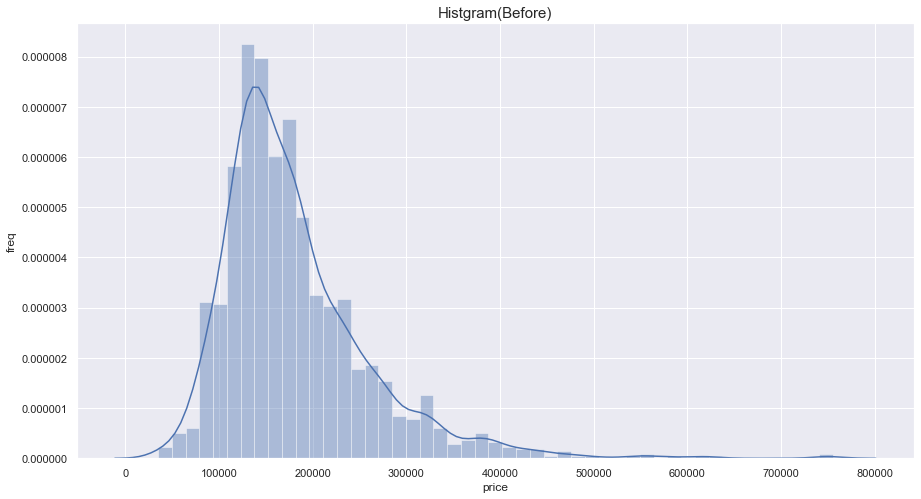

In [643]:
#変更前
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(15,8)})
_=sns.distplot(y)
plt.title('Histgram(Before)', size=15)
plt.ylabel('freq')
plt.xlabel('price')
plt.show()

In [644]:
avg=np.mean(y)
max=np.max(y)
min=np.min(y)
std=np.std(y)

UCL=round( avg+3*std)
print(UCL)

419167


In [645]:
print("住宅価格(SalePrice)のまとめ")
print("平均値：＄", round(avg))
print("最大値：＄", round(max))
print("最小値：＄", round(min))
print("標準偏差：＄", round(std))
print("上記より住宅価格の97.3%は＄419,167)以下に含まれる")

住宅価格(SalePrice)のまとめ
平均値：＄ 180921
最大値：＄ 755000
最小値：＄ 34900
標準偏差：＄ 79415
上記より住宅価格の97.3%は＄419,167)以下に含まれる


len(y>419167)

train_data=train_data[y<419167]

In [646]:
y=train_data.SalePrice

In [647]:
X=train_data.drop(["SalePrice","Id"],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1439 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [648]:
test_data=test_data1.drop(["Id"],axis=1)

test_data.info()

#変更後
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(15,8)})
_=sns.distplot(y)
plt.title('Histgram(After)', size=15)
plt.ylabel('freq')
plt.xlabel('price')
plt.show()

## 説明変数間の相関係数確認

In [649]:
X.corr().style.background_gradient().format('{:.2f}')

cardinality_cols=[ cname for cname in X.columns if X[cname].dtype=="object"]

numeric_cols=[cname for cname in X.columns if X[cname].dtype in ["int64","float64"]]

my_cols=cardinality_cols+numeric_cols

X=X[my_cols].copy()

In [650]:
X_test=test_data.copy()
#X_test=test_data[my_cols].copy()

In [651]:
X=pd.get_dummies(X)
X_test=pd.get_dummies(X_test)

In [652]:
selector=RFE(RandomForestClassifier(n_estimators=200, random_state=42),n_features_to_select=50,step=0.05)

In [653]:
selector.fit(X,y)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=200, n_jobs=None,
                                     oob_score=False, random_state=42,
                                     verbose=0, warm_start=False),
    n_features_to_select=50, step=0.05, verbose=0)

In [654]:
print(selector.support_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True False False  True  True False  True  True
  True  True  True  True  True  True False  True False False  True  True
 False False False False False False False  True  True  True False False
  True False False False False False False  True False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False  T

In [655]:
print(selector.n_features_)

50


In [656]:
print(selector.ranking_)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  9  1  1  5  2  1  1 10  1  1
  1  1  1  1  1  1  7  1 14  4  1  1 14 10 12  2  5 16 15  1  1  1  9 13
  1  9  7 10  4 18 18  1  5  6 14  1  6  8 14 13 17 15  9 11  4  8  6  7
 10 14  8  4 14  8 10  8  7 12  7  6  7 11  8 13  9  6  3 14 11 12 10 16
 15 17 16 13 18 18 18 17 16  5 13 11 10  7  6 12  3 15 13  4 11  8 15  2
 12  2 14 17 18 12 17 18 18 14 16 15 13 17 17  9 18  7  4 17  3  6 17 11
  3  4 10 12 16 14 10 17  9  3 12  3 16  5 15 12  1  4  9 12  1  2  5 11
 15  5  5 16 12  5 18  3  7  3  4 12 15 16  7 11  2  4  9  6 17  4  2  5
  3  1  3  4  2  6  4  2 12 10 13  8  8  4 18 11 13 15 17 16  1  8  2 18
  2  9  9  7 11 17 18  5  7 10  1  3 13 13 10  9 12 18  6  9  6  1  8  1
 15  1 11  6 14  3  2  1  2 17 11 13 16  7 16 11 13 15  9  8 11  6  1  1
  3  1  1  1  5  6 10  1  5  8 15 16 14 13 14  7 16  3  5 15 14 10  2  8]


In [657]:
data_X=pd.DataFrame(X, columns=X.columns[selector.support_])

In [658]:
print("X shape after RFE:", data_X.shape)

X shape after RFE: (1460, 50)


In [659]:
print(data_X.dtypes)

MSSubClass               int64
LotFrontage            float64
LotArea                  int64
OverallQual              int64
OverallCond              int64
YearBuilt                int64
YearRemodAdd             int64
MasVnrArea             float64
BsmtFinSF1               int64
BsmtFinSF2               int64
BsmtUnfSF                int64
TotalBsmtSF              int64
1stFlrSF                 int64
2ndFlrSF                 int64
GrLivArea                int64
BsmtFullBath             int64
HalfBath                 int64
BedroomAbvGr             int64
TotRmsAbvGrd             int64
Fireplaces               int64
GarageYrBlt            float64
GarageCars               int64
GarageArea               int64
WoodDeckSF               int64
OpenPorchSF              int64
EnclosedPorch            int64
ScreenPorch              int64
MoSold                   int64
YrSold                   int64
Alley_Grvl               uint8
Alley_Pave               uint8
LotShape_IR1             uint8
LotShape

##　データ分割

In [660]:
X_train,X_val,y_train,y_val=train_test_split(data_X, y, test_size=0.3, shuffle=True,  random_state=42)

In [661]:
X_train, X_val=X_train.align(X_val, join='left', axis=1)
X_train, X_test=X_train.align(X_test, join='left', axis=1)

In [662]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 135 to 1126
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSSubClass           1022 non-null   int64  
 1   LotFrontage          1022 non-null   float64
 2   LotArea              1022 non-null   int64  
 3   OverallQual          1022 non-null   int64  
 4   OverallCond          1022 non-null   int64  
 5   YearBuilt            1022 non-null   int64  
 6   YearRemodAdd         1022 non-null   int64  
 7   MasVnrArea           1022 non-null   float64
 8   BsmtFinSF1           1022 non-null   int64  
 9   BsmtFinSF2           1022 non-null   int64  
 10  BsmtUnfSF            1022 non-null   int64  
 11  TotalBsmtSF          1022 non-null   int64  
 12  1stFlrSF             1022 non-null   int64  
 13  2ndFlrSF             1022 non-null   int64  
 14  GrLivArea            1022 non-null   int64  
 15  BsmtFullBath         1022 non-null  

In [663]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSSubClass           1459 non-null   int64  
 1   LotFrontage          1459 non-null   float64
 2   LotArea              1459 non-null   int64  
 3   OverallQual          1459 non-null   int64  
 4   OverallCond          1459 non-null   int64  
 5   YearBuilt            1459 non-null   int64  
 6   YearRemodAdd         1459 non-null   int64  
 7   MasVnrArea           1459 non-null   float64
 8   BsmtFinSF1           1459 non-null   float64
 9   BsmtFinSF2           1459 non-null   float64
 10  BsmtUnfSF            1459 non-null   float64
 11  TotalBsmtSF          1459 non-null   float64
 12  1stFlrSF             1459 non-null   int64  
 13  2ndFlrSF             1459 non-null   int64  
 14  GrLivArea            1459 non-null   int64  
 15  BsmtFullBath         1459 non-null   f

## model_1.fit(X_train, y_train)

In [664]:
from xgboost import XGBRegressor

model_1=XGBRegressor(random_state=42)

##　modelトレーニング

In [665]:
model_1.fit(X_train, y_train)

[19:52:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

> ## 検証

In [666]:
from sklearn.metrics import mean_absolute_error

predictions_1=model_1.predict(X_val)

In [667]:
mae_1=mean_absolute_error(predictions_1, y_val)

print("Mean Absolute Error:", mae_1)

Mean Absolute Error: 16732.190844392124


##　model改善

##　提出ファイル作成

In [672]:
preds_test=model_1.predict(X_test)

In [673]:
submit36=test_data1[["Id"]].copy()
submit36['SalePrice']=preds_test

In [674]:
submit36.to_csv(path_or_buf="submit36.csv", sep=",", index=False, header=True)

In [675]:
submit36

,Id,SalePrice
0,1461,124894.281250
1,1462,156241.468750
2,1463,175312.875000
3,1464,182958.406250
4,1465,211043.093750
...,...,...
1454,2915,79134.820312
1455,2916,82764.882812
1456,2917,184519.765625
1457,2918,126371.523438
